Esse projeto faz uma análise e previsão de futuros preços diários de edifícios do "Rio de janeiro Airbnb"
Aqui eu fiz importações iniciais, trouxe o dataframe já renomeado de outro arquivo q eu havia criado pra renomear as colunas.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('total_data_renomeado.csv')

pd.set_option('display.max_columns', None)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16596\3395918098.py:6: DtypeWarning: Columns (2,18,20,21,29,34,35,55,63,64,67,69,70,89) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('total_data_renomeado.csv')


Compreender melhor o dataframe.

In [54]:
print(df.shape)
display(df)
display(df.info())

(784122, 109)


,Unnamed: 0,ID_não_nomeado,ID,URL_do_anúncio,ID_da_coleta,Última_coleta,Nome,Resumo,Espaço,Descrição,Experiências_oferecidas,Visão_do_bairro,Notas,Transporte,Acesso,Interação,Regras_da_casa,URL_miniatura,URL_médio,URL_da_imagem,URL_da_imagem_xl,ID_do_anfitrião,URL_do_anfitrião,Nome_do_anfitrião,Data_de_registro_do_anfitrião,Localização_do_anfitrião,Sobre_o_anfitrião,Tempo_de_resposta_do_anfitrião,Taxa_de_resposta_do_anfitrião,Taxa_de_aceitação_do_anfitrião,É_superhost_do_anfitrião,URL_miniatura_do_anfitrião,URL_da_imagem_do_anfitrião,Bairro_do_anfitrião,Número_de_anúncios_do_anfitrião,Número_total_de_anúncios_do_anfitrião,Verificações_do_anfitrião,Possui_foto_de_perfil_do_anfitrião,Verificação_de_identidade_do_anfitrião,Rua,Bairro,Bairro_limpo,Grupo_de_bairros_limpos,Cidade,Estado,Código_postal,Mercado,Local_inteligente,Código_do_país,País,Latitude,Longitude,É_local_preciso,Tipo_de_propriedade,Tipo_de_quarto,Acomoda,Banheiros,Quartos,Camas,Tipo_de_cama,Comodidades,Pés_quadrados,Preço,Preço_semanal,Preço_mensal,Depósito_de_segurança,Taxa_de_limpeza,Hóspedes_incluídos,Pessoas_extra,Estadia_mínima,Estadia_máxima,Atualização_do_calendário,Tem_disponibilidade,Disponibilidade_30_dias,Disponibilidade_60_dias,Disponibilidade_90_dias,Disponibilidade_365_dias,Última_análise_do_calendário,Número_de_avaliações,Primeira_avaliação,Última_avaliação,Pontuação_das_avaliações,Precisão_das_avaliações,Limpeza_das_avaliações,Check-in_das_avaliações,Comunicação_das_avaliações,Localização_das_avaliações,Valor_das_avaliações,Necessita_licença,Licença,Nomes_de_jurisdição,Pode_reservar_instantaneamente,Está_preparado_para_viagens_de_negócios,Política_de_cancelamento,Requer_foto_de_perfil_do_hóspede,Requer_verificação_por_telefone_do_hóspede,Número_total_de_anúncios_do_anfitrião_calculados,Avaliações_por_mês,Mês,Estadia_mínima_mínima,Estadia_mínima_máxima,Estadia_máxima_mínima,Estadia_máxima_máxima,Estadia_mínima_média_em_dias,Estadia_máxima_média_em_dias,Número_de_avaliações_do_último_ano,Número_total_de_anúncios_calculados_em_casas_inteiras,Número_total_de_anúncios_calculados_em_quartos_privados,Número_total_de_anúncios_calculados_em_quartos_compartilhados
0,0,0.0,17878,https://www.airbnb.com/rooms/17878,2.018082e+13,2018-08-16,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It is a vacatio...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Rio de Janeiro, Brazil",I used to work as a journalist all around the ...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/67b13cea-8...,https://a0.muscache.com/im/pictures/67b13cea-8...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,NaN,Rio de Janeiro,Rio de Janeiro,22020-050,Rio De Janeiro,"Rio de Janeiro, Brazil",BR,Brazil,-22.965919,-43.178962,t,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$307.00,NaN,NaN,$0.00,$311.00,2,$58.00,4,90,a week ago,t,0.0,28.0,58.0,309.0,2018-08-16,213.0,2010-07-15,2018-08-13,93.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1.0,2.16,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,24480,https://www.airbnb.com/rooms/24480,2.018082e+13,2018-08-16,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...","O prédio é bastante simples , mas o apartament...",NaN,"From the

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784122 entries, 0 to 784121
Columns: 109 entries, Unnamed: 0 to Número_total_de_anúncios_calculados_em_quartos_compartilhados
dtypes: float64(36), int64(1), object(72)
memory usage: 652.1+ MB


None

Verifiquei as colunas com mais de 250.000 linhas com valores not a number.

In [55]:
for coluna in df:
    if df[coluna].isnull().sum() > 250000:
        df = df.drop(coluna, axis=1)

print(df.shape)
print(df.isnull().sum())
print(df.isnull().sum().sum())
print(784122*75)

(784122, 76)
Unnamed: 0                                                            0
ID_não_nomeado                                                        1
ID                                                                    0
URL_do_anúncio                                                        0
ID_da_coleta                                                          1
                                                                  ...  
Estadia_máxima_média_em_dias                                     183124
Número_de_avaliações_do_último_ano                               183124
Número_total_de_anúncios_calculados_em_casas_inteiras            183124
Número_total_de_anúncios_calculados_em_quartos_privados          183124
Número_total_de_anúncios_calculados_em_quartos_compartilhados    183124
Length: 76, dtype: int64
1997924
58809150


fiz um drop das colunas em q tinham acima de 250.000 linhas vazias e tendo em vista q tenho 59.8 milhões de dados e os dados faltantes são aproximadamente 2 milhões decidi tirar eles.

In [56]:
df = df.dropna()
print(df.shape)
print(df.isnull().sum())

(500970, 76)
Unnamed: 0                                                       0
ID_não_nomeado                                                   0
ID                                                               0
URL_do_anúncio                                                   0
ID_da_coleta                                                     0
                                                                ..
Estadia_máxima_média_em_dias                                     0
Número_de_avaliações_do_último_ano                               0
Número_total_de_anúncios_calculados_em_casas_inteiras            0
Número_total_de_anúncios_calculados_em_quartos_privados          0
Número_total_de_anúncios_calculados_em_quartos_compartilhados    0
Length: 76, dtype: int64


Analise e remoção de colunas não significativas para a previsão

In [57]:
df = df.drop(['Unnamed: 0', 'ID_não_nomeado', 'ID', 'URL_do_anúncio', 'ID_da_coleta', 'Última_coleta', 'Resumo', 'Descrição', 'URL_da_imagem', 'ID_do_anfitrião', 'URL_do_anfitrião', 'Nome_do_anfitrião', 'Data_de_registro_do_anfitrião', 'Localização_do_anfitrião', 'URL_miniatura_do_anfitrião', 'URL_da_imagem_do_anfitrião', 'Número_de_anúncios_do_anfitrião', 'Verificações_do_anfitrião', 'Possui_foto_de_perfil_do_anfitrião', 'Verificação_de_identidade_do_anfitrião', 'Rua', 'Bairro_limpo', 'Código_postal', 'Local_inteligente', 'Código_do_país', 'É_local_preciso', 'Atualização_do_calendário', 'Tem_disponibilidade', 'Última_análise_do_calendário', 'Necessita_licença', 'Está_preparado_para_viagens_de_negócios', 'Requer_foto_de_perfil_do_hóspede', 'Requer_verificação_por_telefone_do_hóspede', 'Número_total_de_anúncios_do_anfitrião_calculados', 'Estadia_mínima_mínima', 'Estadia_mínima_máxima', 'Número_de_avaliações_do_último_ano', 'Número_total_de_anúncios_calculados_em_casas_inteiras', 'Número_total_de_anúncios_calculados_em_quartos_privados', 'Número_total_de_anúncios_calculados_em_quartos_compartilhados', 'Estadia_máxima_mínima', 'Estadia_máxima_máxima', 'Estadia_mínima_média_em_dias', 'Estadia_máxima_média_em_dias'], axis=1)
print(df.columns)

Index(['Nome', 'Experiências_oferecidas', 'É_superhost_do_anfitrião',
       'Número_total_de_anúncios_do_anfitrião', 'Bairro', 'Cidade', 'Estado',
       'Mercado', 'País', 'Latitude', 'Longitude', 'Tipo_de_propriedade',
       'Tipo_de_quarto', 'Acomoda', 'Banheiros', 'Quartos', 'Camas',
       'Tipo_de_cama', 'Comodidades', 'Preço', 'Hóspedes_incluídos',
       'Pessoas_extra', 'Estadia_mínima', 'Estadia_máxima',
       'Disponibilidade_30_dias', 'Disponibilidade_60_dias',
       'Disponibilidade_90_dias', 'Disponibilidade_365_dias',
       'Número_de_avaliações', 'Pode_reservar_instantaneamente',
       'Política_de_cancelamento', 'Mês'],
      dtype='object')


Mais análises do tipo de dado de cada coluna e o shape pra verificar linhas e colunas do dataframe.

In [58]:
print(df.shape)
print(df.dtypes)

(500970, 32)
Nome                                      object
Experiências_oferecidas                   object
É_superhost_do_anfitrião                  object
Número_total_de_anúncios_do_anfitrião     object
Bairro                                    object
Cidade                                    object
Estado                                    object
Mercado                                   object
País                                      object
Latitude                                 float64
Longitude                                float64
Tipo_de_propriedade                       object
Tipo_de_quarto                            object
Acomoda                                   object
Banheiros                                float64
Quartos                                  float64
Camas                                    float64
Tipo_de_cama                              object
Comodidades                               object
Preço                                     object
Hóspede

Convertendo a coluna preço

In [59]:
#display(df[['Preço']])
#print(df['Preço'].dtypes)
df["Preço"] = df["Preço"].str.replace('$', '').str.replace(',', '')
df["Preço"] = df["Preço"].astype(float)
#display(df[['Preço']])
#print(df['Preço'].dtypes)

Analisar mais colunas

In [60]:
#display(df['Nome'])
#print(df['Nome'].unique())
#print(df['Nome'].value_counts())
#display(df['Experiências_oferecidas'].unique())
#display(df['Experiências_oferecidas'].value_counts())
df = df.drop(['Experiências_oferecidas', 'Bairro', 'Cidade', 'Estado', 'Mercado', 'Nome', 'País'], axis=1)

'''
colunas = ['Nome', 'Bairro', 'Cidade', 'Estado', 'Mercado', 'País', 'Tipo_de_propriedade', 'Tipo_de_quarto']
for coluna in colunas:
    display(df[coluna].unique())
'''

print(df.shape)
display(df.head(4))
display(df.describe())

(500970, 25)


,É_superhost_do_anfitrião,Número_total_de_anúncios_do_anfitrião,Latitude,Longitude,Tipo_de_propriedade,Tipo_de_quarto,Acomoda,Banheiros,Quartos,Camas,Tipo_de_cama,Comodidades,Preço,Hóspedes_incluídos,Pessoas_extra,Estadia_mínima,Estadia_máxima,Disponibilidade_30_dias,Disponibilidade_60_dias,Disponibilidade_90_dias,Disponibilidade_365_dias,Número_de_avaliações,Pode_reservar_instantaneamente,Política_de_cancelamento,Mês
183122,f,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",296.0,2,$56.00,4,90,15.0,29.0,59.0,317.0,218.0,t,strict_14_with_grace_period,1.0
183123,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",""First ...",225.0,2,$218.00,3,90,0.0,0.0,0.0,0.0,85.0,f,strict_14_with_grace_period,1.0
183124,t,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",161.0,2,$45.00,4,30,7.0,15.0,40.0,313.0,221.0,f,strict_14_with_grace_period,1.0
183125,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",243.0,2,$37.00,2,1125,8.0,8.0,23.0,100.0,237.0,t,strict_14_with_grace_period,1.0


,Latitude,Longitude,Banheiros,Quartos,Camas,Preço,Disponibilidade_30_dias,Disponibilidade_60_dias,Disponibilidade_90_dias,Disponibilidade_365_dias,Número_de_avaliações,Mês
count,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000
mean,-22.967036,-43.246192,1.684956,1.635092,2.571693,649.947194,15.423073,32.732461,50.906915,180.786203,9.154297,5.355263
std,0.032616,0.091117,1.006583,1.051489,1.992670,1682.754851,13.040106,25.902994,38.725528,151.874848,24.067639,3.373822
min,-23.073400,-43.569415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-22.984900,-43.294970,1.000000,1.000000,1.000000,152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,-22.971703,-43.197210,1.000000,1.000000,2.000000,295.000000,19.000000,43.000000,68.000000,171.000000,1.000000,4.000000
75%,-22.950130,-43.186250,2.000000,2.000000,3.000000,601.000000,29.000000,59.000000,88.000000,358.000000,6.000000,8.000000
max,-22.799365,-43.159080,30.000000,45.000000,86.000000,138262.000000,30.000000,60.000000,90.000000,365.000000,401.000000,12.000000


Utilizei um gráfico com o matplotlib e o seaborn pra analisar algumas correlações entre as colunas do dataframe e a coluna Preço.

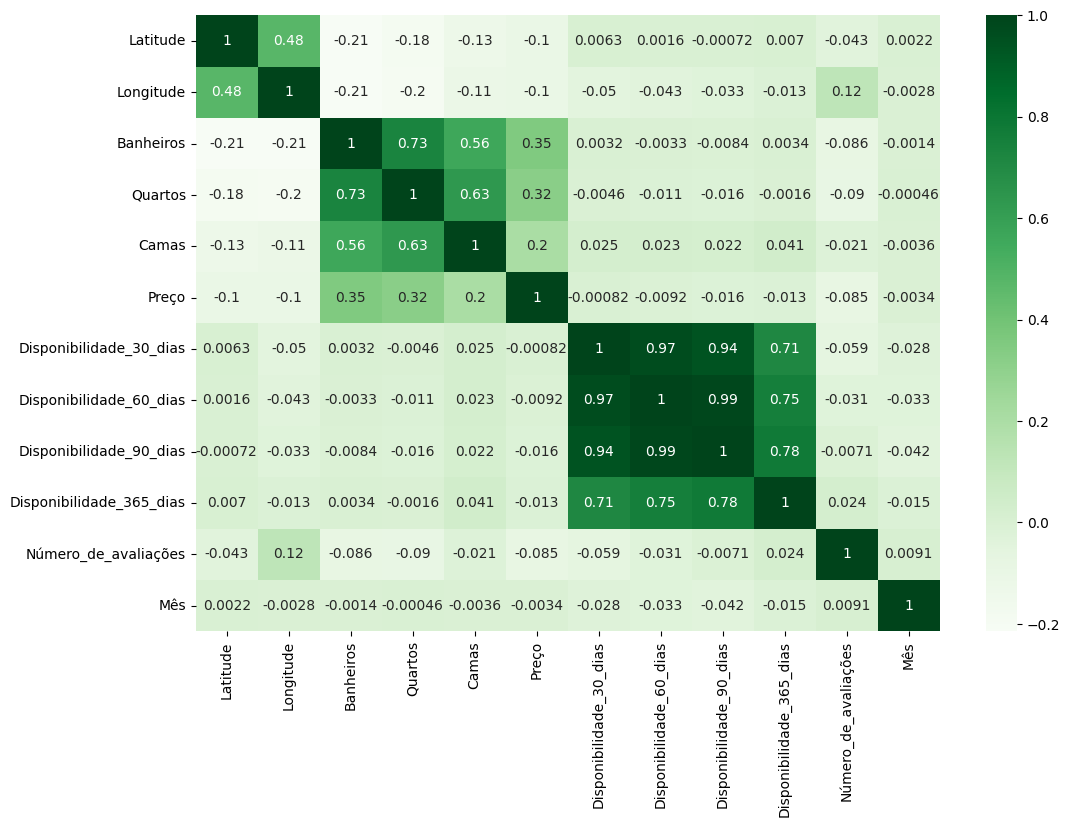

Index(['É_superhost_do_anfitrião', 'Número_total_de_anúncios_do_anfitrião',
       'Latitude', 'Longitude', 'Tipo_de_propriedade', 'Tipo_de_quarto',
       'Acomoda', 'Banheiros', 'Quartos', 'Camas', 'Tipo_de_cama',
       'Comodidades', 'Preço', 'Hóspedes_incluídos', 'Pessoas_extra',
       'Estadia_mínima', 'Estadia_máxima', 'Disponibilidade_30_dias',
       'Disponibilidade_60_dias', 'Disponibilidade_90_dias',
       'Disponibilidade_365_dias', 'Número_de_avaliações',
       'Pode_reservar_instantaneamente', 'Política_de_cancelamento', 'Mês'],
      dtype='object')


In [61]:
import seaborn as sns
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Greens')
plt.show()
print(df.columns)

Tratei de algumas colunas pros modelos conseguirem treinar com elas

In [62]:
#for valor, contagem in df['Nome'].value_counts().items():
#print(df['País'].unique())
'''for coluna in df.columns:
    print(f'{coluna}: {df[coluna].unique()}')
    print('\n')'''

df['Acomoda'] = df['Acomoda'].astype(str).str.strip().astype(int)
df['Hóspedes_incluídos'] = df['Hóspedes_incluídos'].astype(int)
df['Pessoas_extra'] = df['Pessoas_extra'].str.replace(',', '').astype(str).str.strip().str.replace('$', '').astype(float)
df = df.drop('Estadia_máxima', axis=1)

df.loc[df['Tipo_de_propriedade'].map(df['Tipo_de_propriedade'].value_counts()) < 300, 'Tipo_de_propriedade'] = 'Outra categoria'


Converti algumas colunas em colunas categóricas para mais pra frente usar um one-hot encode com o pd.dummies.

In [63]:

df['Estadia_mínima'] = df['Estadia_mínima'].astype(int)

colunas = ['Mês', 'Política_de_cancelamento', 'É_superhost_do_anfitrião', 'Tipo_de_propriedade', 'Tipo_de_quarto', 'Tipo_de_cama', 'Comodidades', 'Pode_reservar_instantaneamente']

for coluna in colunas:
    df[coluna] = df[coluna].astype('category')


#display(df['Hóspedes_incluídos'].value_counts())
#display(df[['Pode_reservar_instantaneamente']])
#display(df['Pode_reservar_instantaneamente'].unique())
#print(df.dtypes)



Mais uma conversão.

In [64]:
df['Número_de_avaliações'] = df['Número_de_avaliações'].astype(int)

Fiz um drop em outras colunas que não serão tão necessárias no treinamento e previsão dos modelos.

In [65]:
df = df.drop(['Disponibilidade_30_dias', 'Disponibilidade_60_dias', 'Disponibilidade_90_dias', 'Disponibilidade_365_dias', 'Pode_reservar_instantaneamente', 'Comodidades'], axis=1)
print(df.shape)
print(df.dtypes)

(500970, 18)
É_superhost_do_anfitrião                 category
Número_total_de_anúncios_do_anfitrião      object
Latitude                                  float64
Longitude                                 float64
Tipo_de_propriedade                      category
Tipo_de_quarto                           category
Acomoda                                     int32
Banheiros                                 float64
Quartos                                   float64
Camas                                     float64
Tipo_de_cama                             category
Preço                                     float64
Hóspedes_incluídos                          int32
Pessoas_extra                             float64
Estadia_mínima                              int32
Número_de_avaliações                        int32
Política_de_cancelamento                 category
Mês                                      category
dtype: object


Análise de algumas colunas.

In [66]:
colunas = ['É_superhost_do_anfitrião', 'Tipo_de_propriedade', 'Tipo_de_quarto', 'Tipo_de_cama']
for coluna in colunas:
    print(f'{coluna}:', df[coluna].value_counts())
    print()


É_superhost_do_anfitrião: É_superhost_do_anfitrião
f    439603
t     61367
Name: count, dtype: int64

Tipo_de_propriedade: Tipo_de_propriedade
Apartment             395525
House                  41651
Condominium            24874
Serviced apartment     11759
Loft                   10023
Bed and breakfast       2801
Guest suite             2793
Hostel                  2329
Outra categoria         1711
Guesthouse              1611
Villa                   1519
Other                   1437
Townhouse                933
Aparthotel               580
Boutique hotel           577
Hotel                    520
Boat                     327
Name: count, dtype: int64

Tipo_de_quarto: Tipo_de_quarto
Entire home/apt    362172
Private room       126969
Shared room         10090
Hotel room           1739
Name: count, dtype: int64

Tipo_de_cama: Tipo_de_cama
Real Bed         493941
Pull-out Sofa      4742
Futon              1112
Airbed              780
Couch               395
Name: count, dtype: int64



In [67]:
#df.describe(include='all')
#df.nunique()
print(df.dtypes)
print(df.Hóspedes_incluídos.value_counts())
display(df.head(4))

É_superhost_do_anfitrião                 category
Número_total_de_anúncios_do_anfitrião      object
Latitude                                  float64
Longitude                                 float64
Tipo_de_propriedade                      category
Tipo_de_quarto                           category
Acomoda                                     int32
Banheiros                                 float64
Quartos                                   float64
Camas                                     float64
Tipo_de_cama                             category
Preço                                     float64
Hóspedes_incluídos                          int32
Pessoas_extra                             float64
Estadia_mínima                              int32
Número_de_avaliações                        int32
Política_de_cancelamento                 category
Mês                                      category
dtype: object
Hóspedes_incluídos
1     358398
2      67159
4      33454
3      13637
6      12736
5 

,É_superhost_do_anfitrião,Número_total_de_anúncios_do_anfitrião,Latitude,Longitude,Tipo_de_propriedade,Tipo_de_quarto,Acomoda,Banheiros,Quartos,Camas,Tipo_de_cama,Preço,Hóspedes_incluídos,Pessoas_extra,Estadia_mínima,Número_de_avaliações,Política_de_cancelamento,Mês
183122,f,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,296.0,2,56.0,4,218,strict_14_with_grace_period,1.0
183123,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,225.0,2,218.0,3,85,strict_14_with_grace_period,1.0
183124,t,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,161.0,2,45.0,4,221,strict_14_with_grace_period,1.0
183125,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,243.0,2,37.0,2,237,strict_14_with_grace_period,1.0


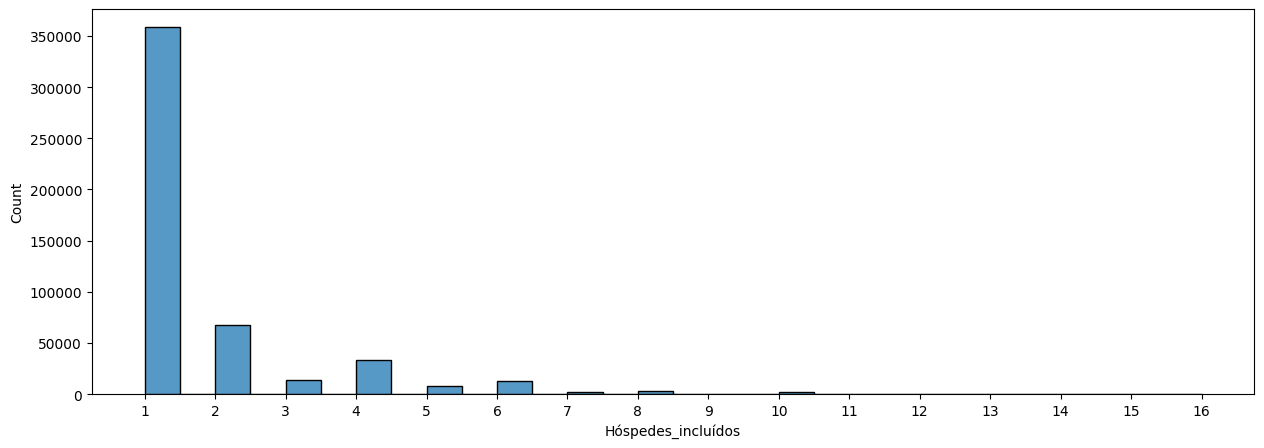

In [68]:
coluna = 'Hóspedes_incluídos'
plt.figure(figsize=(15,5))
sns.histplot(data=df, x=coluna, bins=30)
plt.xticks(np.arange(1, df[coluna].max()+1, 1))
plt.show()



In [69]:
coluna = 'Número_total_de_anúncios_do_anfitrião'
df[coluna] = df[coluna].astype(float).astype(int)
print(df[coluna].unique())

[   2    1    3    8    4   41    5    7   10    9    6   12   64   24
   60   38   15   17   14   36   61   22   18   58   44   56   20   11
   21   16   13   32    0   25   47   29   35   19   23  151   63   67
   42   37   33   57   28   45  262  314  120  457   78   76   49   30
   43   65   26   40   50   39  153   69  113   62  265  320  116  481
   80   27   31   48   34  149   66  130   59  254  331  114  530   83
   46  132  292  333   52  109  585   85   82   54  171  126  299   71
  337  673   96  170  313  340  728   99   86   53  162  338  776   70
  111  297  335  807  112   68  107  300  316   75  106   73  270  302
   51  103   74  182  105  141  281   93  102   81  175  290  163  261
   90   79  142   55  101  172  276   87  161  336  100  280   84  198
  327 1495  329 1379  185]


Movi a coluna Preço para o final do dataframe para facilitar as interações futuras no código.

In [70]:
coluna_preco = df.pop("Preço")
df["Preço"] = coluna_preco

Análises finais.

In [71]:
display(df)
print(df.dtypes)
display(df.describe())

,É_superhost_do_anfitrião,Número_total_de_anúncios_do_anfitrião,Latitude,Longitude,Tipo_de_propriedade,Tipo_de_quarto,Acomoda,Banheiros,Quartos,Camas,Tipo_de_cama,Hóspedes_incluídos,Pessoas_extra,Estadia_mínima,Número_de_avaliações,Política_de_cancelamento,Mês,Preço
183122,f,2,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,2,56.0,4,218,strict_14_with_grace_period,1.0,296.0
183123,f,1,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,2,218.0,3,85,strict_14_with_grace_period,1.0,225.0
183124,t,3,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,2,45.0,4,221,strict_14_with_grace_period,1.0,161.0
183125,t,1,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,2,37.0,2,237,strict_14_with_grace_period,1.0,243.0
183127,t,1,-22.988165,-43.193588,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,2,56.0,2,139,strict_14_with_grace_period,1.0,337.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784107,f,0,-23.012870,-43.540660,Condominium,Entire home/apt,6,1.0,2.0,2.0,Real Bed,1,110.0,1,0,flexible,4.0,189.0
784109,f,0,-22.982960,-43.191350,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0.0,3,0,flexible,4.0,183.0
784111,f,1,-22.979040,-43.224470,Apartment,Entire home/apt,4,1.0,1.0,3.0,Real Bed,1,0.0,1,0,flexible,4.0,448.0
784114,f,1,-22.980750,-43.191010,Boutique hotel,Private room,4,1.0,2.0,0.0,Real Bed,1,0.0,1,0,flexible,4.0,149.0


É_superhost_do_anfitrião                 category
Número_total_de_anúncios_do_anfitrião       int32
Latitude                                  float64
Longitude                                 float64
Tipo_de_propriedade                      category
Tipo_de_quarto                           category
Acomoda                                     int32
Banheiros                                 float64
Quartos                                   float64
Camas                                     float64
Tipo_de_cama                             category
Hóspedes_incluídos                          int32
Pessoas_extra                             float64
Estadia_mínima                              int32
Número_de_avaliações                        int32
Política_de_cancelamento                 category
Mês                                      category
Preço                                     float64
dtype: object


,Número_total_de_anúncios_do_anfitrião,Latitude,Longitude,Acomoda,Banheiros,Quartos,Camas,Hóspedes_incluídos,Pessoas_extra,Estadia_mínima,Número_de_avaliações,Preço
count,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000,500970.000000
mean,9.547863,-22.967036,-43.246192,4.177298,1.684956,1.635092,2.571693,1.704278,42.088490,4.771974,9.154297,649.947194
std,57.446652,0.032616,0.091117,2.396889,1.006583,1.051489,1.992670,1.526182,102.200599,21.098360,24.067639,1682.754851
min,0.000000,-23.073400,-43.569415,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,-22.984900,-43.294970,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,152.000000
50%,1.000000,-22.971703,-43.197210,4.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,295.000000
75%,3.000000,-22.950130,-43.186250,5.000000,2.000000,2.000000,3.000000,2.000000,50.000000,4.000000,6.000000,601.000000
max,1495.000000,-22.799365,-43.159080,25.000000,30.000000,45.000000,86.000000,16.000000,5631.000000,1000.000000,401.000000,138262.000000


Utilizei 3 modelos de previsão poderosos para analisar dados numéricos em dataframes e para previsão de preços. A escolha dos 3 modelos foi por serem poderosos com dados numéricos mas eu sabia que o ExtraTreesRegressor e o RandomForestRegressor teriam melhores desempenhos em relação ao LinearRegression, por criarem árvores de decisões e conseguirem treinar bem com dados categóricos.

O código a seguir é um treinamento dos 3 modelos e uma análise de precisão com o R² que é melhor para avaliar a precisão de modelos de regressão.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import r2_score

y = df['Preço']
x = df.drop('Preço', axis=1)

x_encoded = pd.get_dummies(x, drop_first=False)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=None)
extra_trees_model = ExtraTreesRegressor(random_state=42, n_estimators=100, max_depth=None)

linear_model.fit(x_treino, y_treino)
random_forest_model.fit(x_treino, y_treino)
extra_trees_model.fit(x_treino, y_treino)

linear_predicao = linear_model.predict(x_teste)
random_forest_predicao = random_forest_model.predict(x_teste)
extra_trees_predicao = extra_trees_model.predict(x_teste)

r2_linear = r2_score(y_teste, linear_predicao)
r2_random_forest = r2_score(y_teste, random_forest_predicao)
r2_extra_trees = r2_score(y_teste, extra_trees_predicao)

print(f'linear: {r2_linear}')
print(f'random_forest: {r2_random_forest}')
print(f'extra_trees: {r2_extra_trees}')

#random_forest: 0.9101550549028121
#extra_trees: 0.9378759629411668

#random_forest: 0.910892439634182
#extra_trees: 0.9498931416093673
#linear: 0.15208125195693867

#linear: 0.16565249623246003
#random_forest: 0.9522279531354579
#extra_trees: 0.953546620040217

linear: 0.16565249623246003
random_forest: 0.9522279531354579
extra_trees: 0.953546620040217


Interação com o usuário para futuras previsões.

In [ ]:
dados_usuario = {}

nova_tabela = df.drop('Preço', axis=1)

for coluna in nova_tabela.columns:
    dado = input(f"Insira o valor para a coluna '{coluna}': ")
    if nova_tabela[coluna].dtypes == int or nova_tabela[coluna].dtypes == float:
        dado = int(dado) if '.' not in dado else float(dado)
    dados_usuario[coluna] = [dado]

novos_dados = pd.DataFrame(dados_usuario)

dados_treinamento_encoded = pd.get_dummies(x, drop_first=False)

colunas_treinamento = dados_treinamento_encoded.columns

for coluna in colunas_treinamento:
    if coluna not in novos_dados.columns:
        novos_dados[coluna] = 0

novos_dados = novos_dados[colunas_treinamento]

novos_dados_encoded = pd.get_dummies(novos_dados, drop_first=False)

colunas_faltantes = set(dados_treinamento_encoded.columns) - set(novos_dados_encoded.columns)
if colunas_faltantes:
    novos_dados_encoded = novos_dados_encoded.reindex(columns=novos_dados_encoded.columns.union(colunas_faltantes), fill_value=0)

previsoes_extra_trees = extra_trees_model.predict(novos_dados_encoded)

print(f'A previsão do preço para os dados fornecidos foi de ${int(previsoes_extra_trees)},00')
